<a href="https://colab.research.google.com/github/FarhanKhan1/Transformers_NLP_Intermediate/blob/main/sentiment_analysis_fine_tuning_with_custom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 26.5 MB/s 
     |████████████████████████████████| 212 kB 65.9 MB/s 
     |████████████████████████████████| 163 kB 58.4 MB/s 
     |████████████████████████████████| 95 kB 2.2 MB/s 
     |████████████████████████████████| 115 kB 68.3 MB/s 
     |████████████████████████████████| 127 kB 72.1 MB/s 
     |████████████████████████████████| 115 kB 76.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6


In [ ]:

!pip install transformers
from datasets import load_dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 36.9 MB/s 
     |████████████████████████████████| 7.6 MB 55.3 MB/s 


In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2022-11-10 10:07:36--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M   506KB/s    in 8.4s    

2022-11-10 10:07:46 (398 KB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('AirlineTweets.csv')

In [ ]:
print(df[['text', 'airline_sentiment']])

                                                    text airline_sentiment
0                    @VirginAmerica What @dhepburn said.           neutral
1      @VirginAmerica plus you've added commercials t...          positive
2      @VirginAmerica I didn't today... Must mean I n...           neutral
3      @VirginAmerica it's really aggressive to blast...          negative
4      @VirginAmerica and it's a really big bad thing...          negative
...                                                  ...               ...
14635  @AmericanAir thank you we got on a different f...          positive
14636  @AmericanAir leaving over 20 minutes Late Flig...          negative
14637  @AmericanAir Please bring American Airlines to...           neutral
14638  @AmericanAir you have my money, you change my ...          negative
14639  @AmericanAir we have 8 ppl so we need 2 know h...           neutral

[14640 rows x 2 columns]


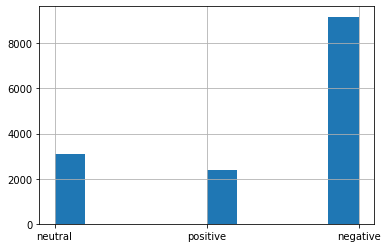

In [ ]:
df.airline_sentiment.hist()

In [ ]:
target_mapping = {'positive':1, 'negative':0, 'neutral':2}

In [ ]:
df['label'] = df.airline_sentiment.map(target_mapping)

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,label
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),2
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),1
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),2
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0


In [ ]:
print(df[['text','airline_sentiment', 'label']].head())

                                                text airline_sentiment  label
0                @VirginAmerica What @dhepburn said.           neutral      2
1  @VirginAmerica plus you've added commercials t...          positive      1
2  @VirginAmerica I didn't today... Must mean I n...           neutral      2
3  @VirginAmerica it's really aggressive to blast...          negative      0
4  @VirginAmerica and it's a really big bad thing...          negative      0


In [ ]:
df = df[['text', 'airline_sentiment', 'label']]

In [ ]:
df.to_csv('data.csv', index=None)

In [ ]:
df1 = pd.read_csv('data.csv')

In [ ]:
df1

,text,airline_sentiment,label
0,@VirginAmerica What @dhepburn said.,neutral,2
1,@VirginAmerica plus you've added commercials t...,positive,1
2,@VirginAmerica I didn't today... Must mean I n...,neutral,2
3,@VirginAmerica it's really aggressive to blast...,negative,0
4,@VirginAmerica and it's a really big bad thing...,negative,0
...,...,...,...
14635,@AmericanAir thank you we got on a different f...,positive,1
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,0
14637,@AmericanAir Please bring American Airlines to...,neutral,2
14638,"@AmericanAir you have my money, you change my ...",negative,0


In [ ]:
from datasets import load_dataset


In [ ]:
raw_dataset = load_dataset('csv', data_files='data.csv')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-f60fd15ab76dd68c/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'airline_sentiment', 'label'],
        num_rows: 14640
    })
})

In [ ]:
splitted_data = raw_dataset['train'].train_test_split(test_size = 0.3, seed=42)

In [ ]:
splitted_data

DatasetDict({
    train: Dataset({
        features: ['text', 'airline_sentiment', 'label'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['text', 'airline_sentiment', 'label'],
        num_rows: 4392
    })
})

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")
 


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
def tokenization_(row):
  return tokenizer(row['text'], truncation=True)

In [ ]:
tokenized_data = splitted_data.map(tokenization_, batched=True)

  0%|          | 0/11 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

In [ ]:
tokenized_data

DatasetDict({
    train: Dataset({
        features: ['text', 'airline_sentiment', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['text', 'airline_sentiment', 'label', 'input_ids', 'attention_mask'],
        num_rows: 4392
    })
})

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

In [ ]:
my_model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-cased', num_labels=3)

Downloading:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier.bia

In [ ]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchinfo import summary

In [ ]:
summary(my_model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              22,268,928
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           2,307
├─Dropout: 1-4                                          --
Total params: 65,783,811
Trainable params: 65,783,811
Non-trainable params: 0

In [ ]:
training_argument = TrainingArguments(
    #per_device_eval_batch_size=64,
    #per_device_train_batch_size=16,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=3,
    output_dir = 'training_dir'
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
import numpy as np
def compute_matric(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis=-1)
  acc = np.mean(predictions==labels)
  return{'accuracy':float(acc)}

In [ ]:
trainer = Trainer(
    my_model,
    training_argument,
    train_dataset=tokenized_data['train'],
    eval_dataset = tokenized_data['test'],
    tokenizer = tokenizer,
    compute_metrics = compute_matric
)

In [ ]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, airline_sentiment. If text, airline_sentiment are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 10248
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 3843
  Number of trainable parameters = 65783811


Epoch,Training Loss,Validation Loss,Accuracy
1,0.356800,0.483110,0.826958
2,0.285700,0.799916,0.827186
3,0.140800,0.927425,0.827413


The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, airline_sentiment. If text, airline_sentiment are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 4392
  Batch size = 8
Saving model checkpoint to training_dir/checkpoint-1281
Configuration saved in training_dir/checkpoint-1281/config.json
Model weights saved in training_dir/checkpoint-1281/pytorch_model.bin
tokenizer config file saved in training_dir/checkpoint-1281/tokenizer_config.json
Special tokens file saved in training_dir/checkpoint-1281/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, airline_sentiment. If text, airline_sentiment are not expected by `DistilBertForSequenceClassification.forward

TrainOutput(global_step=3843, training_loss=0.26789828858088927, metrics={'train_runtime': 247.5555, 'train_samples_per_second': 124.19, 'train_steps_per_second': 15.524, 'total_flos': 359758893180960.0, 'train_loss': 0.26789828858088927, 'epoch': 3.0})

In [ ]:
!ls training_dir

checkpoint-1281  checkpoint-2562  checkpoint-3843  runs


In [ ]:
from transformers import pipeline
my_model_saved = pipeline('text-classification', model = 'training_dir/checkpoint-3843', device=0)

loading configuration file training_dir/checkpoint-3843/config.json
Model config DistilBertConfig {
  "_name_or_path": "training_dir/checkpoint-3843",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.24.0",
  "vocab_size": 28996
}

loading configuration file training_dir/checkpoint-3843/config.json
Model config DistilBertConfig {
  "_

In [ ]:
predictions = my_model_saved(splitted_data['test']['text'])

Disabling tokenizer parallelism, we're using DataLoader multithreading already


In [ ]:
splitted_data['test']

Dataset({
    features: ['text', 'airline_sentiment', 'label'],
    num_rows: 4392
})

In [ ]:
predictions

[{'label': 'LABEL_1', 'score': 0.9951359629631042},
 {'label': 'LABEL_1', 'score': 0.9952126741409302},
 {'label': 'LABEL_0', 'score': 0.9843581914901733},
 {'label': 'LABEL_1', 'score': 0.9900503158569336},
 {'label': 'LABEL_0', 'score': 0.6358652710914612},
 {'label': 'LABEL_0', 'score': 0.9993392825126648},
 {'label': 'LABEL_2', 'score': 0.9821078181266785},
 {'label': 'LABEL_2', 'score': 0.9917342662811279},
 {'label': 'LABEL_1', 'score': 0.9296969175338745},
 {'label': 'LABEL_0', 'score': 0.9995567202568054},
 {'label': 'LABEL_0', 'score': 0.9993588328361511},
 {'label': 'LABEL_0', 'score': 0.9995818734169006},
 {'label': 'LABEL_1', 'score': 0.9973956346511841},
 {'label': 'LABEL_0', 'score': 0.9992176294326782},
 {'label': 'LABEL_2', 'score': 0.9982812404632568},
 {'label': 'LABEL_2', 'score': 0.9972042441368103},
 {'label': 'LABEL_1', 'score': 0.9931679964065552},
 {'label': 'LABEL_0', 'score': 0.9994590878486633},
 {'label': 'LABEL_0', 'score': 0.9992524981498718},
 {'label': '